In [1]:
# importing libraries

import pandas as pd
import wget as wget
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 # DataSet #

In [3]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

'car_fuel_efficiency (3).csv'

In [2]:
df = pd.read_csv("car_fuel_efficiency (1).csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# Preparing the dataset #

In [3]:
df_selected = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_selected.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


# EDA #

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


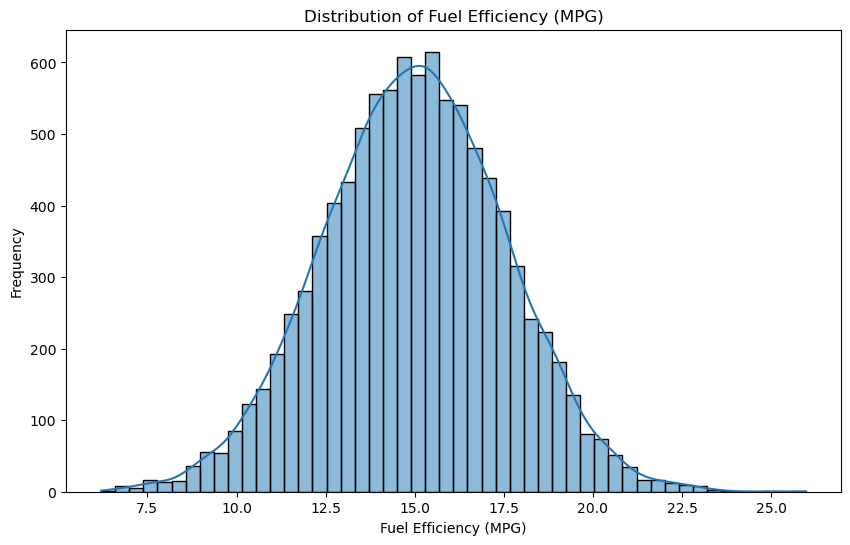

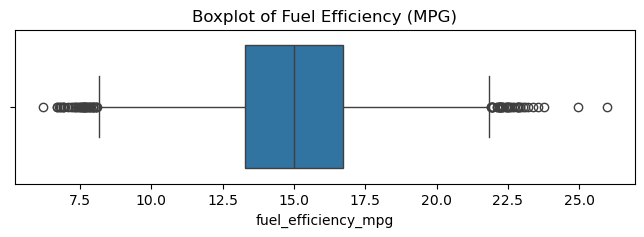

In [4]:
# Summary statistics
print(df_selected['fuel_efficiency_mpg'].describe())

# Histogram and KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(df_selected['fuel_efficiency_mpg'], bins=50, kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for long tail
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_selected['fuel_efficiency_mpg'])
plt.title('Boxplot of Fuel Efficiency (MPG)')
plt.show()

#### As we can see from the histogram the data does not have a long tail and its normaly distributed ####

# Question 1 #

In [5]:
# Check for missing values in the specified columns
missing_counts = df_selected[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].isnull().sum()
print(missing_counts)

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64


# Question 2 #

In [ ]:
# Calculate the median of the 'horsepower' column
df_selected['horsepower'].median()

149.0

In [7]:
np.random.seed(42)

n = len(df_selected)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df_selected.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

In [8]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Question 3 #

In [9]:
# linear regression implementation

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [10]:
# features to use

base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [11]:
# function to prepare X matrix

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

### with mean imputation option for horsepower ###

In [12]:
# with mean imputation option for horsepower

df_selected_mean_hp = df_train.copy()
df_selected_mean_hp['horsepower'] = df_selected_mean_hp['horsepower'].fillna(df_selected_mean_hp['horsepower'].mean())

In [13]:

X_train = prepare_X(df_selected_mean_hp)
w_0, w = train_linear_regression(X_train, y_train)

In [14]:

y_pred = w_0 + X_train.dot(w)

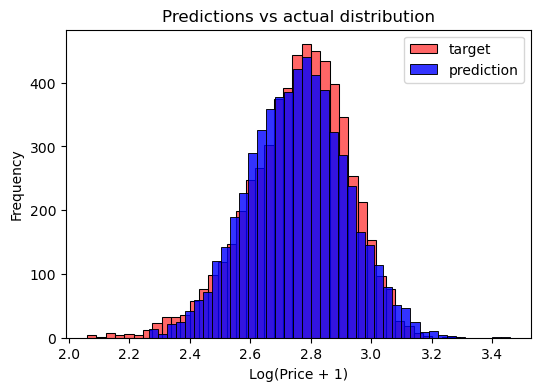

In [16]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [17]:
# function to calculate RMSE

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [18]:

rmse(y_train, y_pred)

0.03581083785900231

In [20]:
# predictions on validation set

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [21]:
rmse(y_val, y_pred)

0.04497119648506958

### with 0 imputation option for horsepower ###

In [22]:
# with 0 imputation option for horsepower
df_selected_0_hp = df_train.copy()
df_selected_0_hp['horsepower'] = df_selected_0_hp['horsepower'].fillna(0)

X_train = prepare_X(df_selected_0_hp)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

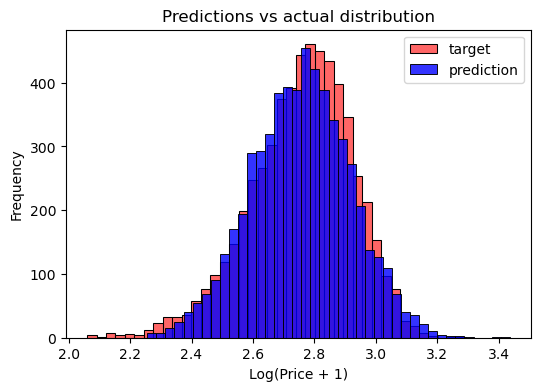

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [24]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.039979257823471975

In [25]:
# Create a table for RMSE values
rmse_table = pd.DataFrame({
    'Imputation Method': ['mean', '0'],
    'RMSE': [0.0449, 0.0399]
})

rmse_table

,Imputation Method,RMSE
0,mean,0.0449
1,0,0.0399


# Question 4 #

In [26]:
# linear regression with regularization

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
X_train = prepare_X(df_selected_0_hp)

In [28]:
# testing different values of r

for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print(f"r={r:5}, w_0={w_0:.2f}, weights={w}")

r=    0, w_0=3.66, weights=[ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673231e-05]
r= 0.01, w_0=3.17, weights=[ 3.04741123e-06  2.21206603e-04 -3.23358757e-04  2.62739024e-04]
r=    1, w_0=0.22, weights=[ 8.39433529e-06  2.21190579e-04 -3.22752535e-04  1.72724144e-03]
r=   10, w_0=0.02, weights=[ 8.75140984e-06  2.21189451e-04 -3.22712045e-04  1.82501293e-03]
r=  100, w_0=0.00, weights=[ 8.79046139e-06  2.21188756e-04 -3.22707550e-04  1.83540790e-03]


In [29]:
X_train = prepare_X(df_selected_0_hp)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred), 2))

train 0.03908632539265249
val 0.04


In [30]:
X_train = prepare_X(df_selected_0_hp)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred), 2))

train 0.039120822415051305
val 0.04


In [31]:
X_train = prepare_X(df_selected_0_hp)
w_0, w = train_linear_regression_reg(X_train, y_train, r=1)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred), 2))

train 0.04071772167568004
val 0.04


In [32]:
X_train = prepare_X(df_selected_0_hp)
w_0, w = train_linear_regression_reg(X_train, y_train, r=10)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred), 2))

train 0.04090524606547274
val 0.04


In [33]:
X_train = prepare_X(df_selected_0_hp)
w_0, w = train_linear_regression_reg(X_train, y_train, r=100)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred), 2))

train 0.04092574472022829
val 0.04


In [34]:
X_train = prepare_X(df_selected_0_hp)
X_val = prepare_X(df_val)

for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    #print('%6s' %r, rmse(y_val, y_pred))
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 0.04
  0.01 0.04
     1 0.04
    10 0.04
   100 0.04


In [35]:
X_train = prepare_X(df_selected_0_hp)
X_val = prepare_X(df_val)

for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.039979257823471975
  0.01 0.0399778720173045
     1 0.0413538515083068
    10 0.04152680123751742
   100 0.04154575656081093


# Question 5 #

In [36]:
rmse_scores = []

for seed in range(10):
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df_selected.iloc[idx]

    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = n - n_train - n_val

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    df_train_0_hp = df_train.copy()
    df_train_0_hp['horsepower'] = df_train_0_hp['horsepower'].fillna(0)
    X_train = df_train_0_hp[base].values
    y_train = np.log1p(df_train['fuel_efficiency_mpg'].values)

    df_val_0_hp = df_val.copy()
    df_val_0_hp['horsepower'] = df_val_0_hp['horsepower'].fillna(0)
    X_val = df_val_0_hp[base].values
    y_val = np.log1p(df_val['fuel_efficiency_mpg'].values)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

std = np.std(rmse_scores)

# additional code to list the rmse scores
for score in rmse_scores:
    print(round(score, 3))

print("RMSE STD:", round(std, 3))

0.038
0.039
0.039
0.039
0.037
0.039
0.039
0.038
0.04
0.039
RMSE STD: 0.001


# Question 6 #

In [37]:
# Set seed and shuffle indices
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df_selected.iloc[idx]

# Split sizes
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

# Split datasets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# Combine train and validation sets
df_train_val = pd.concat([df_train, df_val])

# Combine train and validation sets for y values
y_train_val = np.log1p(df_train_val['fuel_efficiency_mpg'].values)

# Fill missing values with 0
df_train_val_0_hp = df_train_val.copy()
df_train_val_0_hp['horsepower'] = df_train_val_0_hp['horsepower'].fillna(0)
X_train_val = df_train_val_0_hp[base].values
y_train_val = np.log1p(df_train_val['fuel_efficiency_mpg'].values)

df_test_0_hp = df_test.copy()
df_test_0_hp['horsepower'] = df_test_0_hp['horsepower'].fillna(0)
X_test = df_test_0_hp[base].values
y_test = np.log1p(df_test['fuel_efficiency_mpg'].values)

# Train model with r=0.001
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Predict and calculate RMSE on test set
y_pred = w_0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred)
print("Test RMSE:", round(test_rmse, 4))

Test RMSE: 0.0392


In [38]:
X_train = prepare_X(df_train_val_0_hp)
w_0, w = train_linear_regression_reg(X_train, y_train_val, r=0.001)

y_pred = w_0 + X_train.dot(w)
print('Train', rmse(y_train_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('Test', round(rmse(y_test, y_pred), 4))

Train 0.03898196364597112
Test 0.0392
